Берем датасет из урока 14

для столбцов Age и Balance определите:

1.размах вариации

2.среднее по выборке

3.медиану

4.стандартное отклонение

Отфильтруйте данные - выберите для анализа записи о клиентах из Германии и расчитайте те же показатели.

Сделайте выводы/предположения о содержимом датасета на основе полученных характеристик.


In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
df = pd.read_csv("Churn_Modelling1.csv", index_col="RowNumber")

In [143]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Определим некоторые агрегационные функции

In [144]:
def range_of_variations(x):
    return x.max() - x.min()

def median(x):
    return x.quantile(0.5)

Рассчитаем:
- Размах вариации (наибольшее минус наименьшее)
- Среднее
- Медиану
- Стандартное отклонение (корень из диспресии) 

для возраста и текущего баланса всех клиентов банка из данного датафарейма

In [145]:
for col in df["Age"], df["Balance"]:
    print(col.agg([range_of_variations, "mean", median, "std"]))

range_of_variations    74.000000
mean                   38.921800
median                 37.000000
std                    10.487806
Name: Age, dtype: float64
range_of_variations    250898.090000
mean                    76485.889288
median                  97198.540000
std                     62397.405202
Name: Balance, dtype: float64


Получим список всех уникальных стран.

In [146]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Отделим только клиентов из Германии.

In [147]:
df_german_only = df[df["Geography"] == "Germany"]

In [148]:
df_german_only.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
27,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0
29,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0


Рассчитаем те же показтели для немецких клиентов.

In [149]:
for col in df_german_only["Age"], df_german_only["Balance"]:
    print(col.agg([range_of_variations, "mean", median, "std"]))

range_of_variations    66.000000
mean                   39.771622
median                 38.000000
std                    10.519143
Name: Age, dtype: float64
range_of_variations    187058.530000
mean                   119730.116134
median                 119703.100000
std                     27022.006157
Name: Balance, dtype: float64


"Посморим" на эти признаки с разделение по странам

In [150]:
df.groupby(by="Geography")["CustomerId"].count()

Geography
France     5014
Germany    2509
Spain      2477
Name: CustomerId, dtype: int64

Отметим, что в датасете преобладают клиенты из Франции.

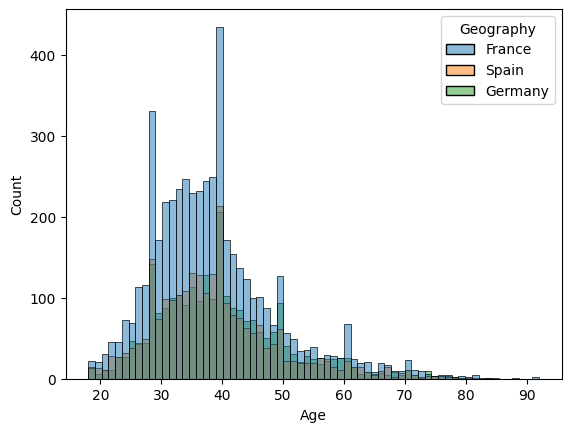

In [151]:
sns.histplot(data=df, x="Age", hue="Geography");

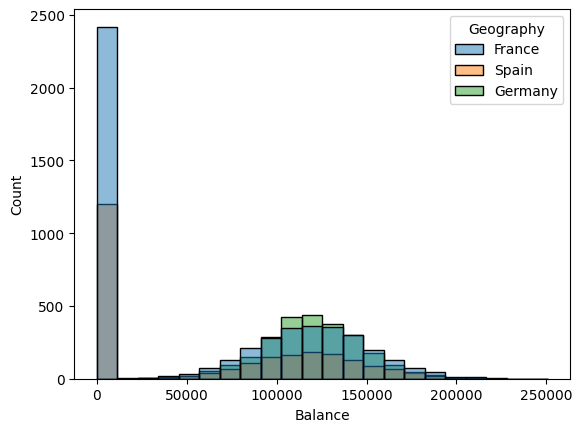

In [152]:
sns.histplot(data=df, x="Balance", hue="Geography");

Кроме того, что число клиентов по странам различно, распределения схожи по форме. Заметим, что распределение баланса (не нулевого) возможно будет нормальным, однако имеется большая группа клиентов, с нулевым балансом. Целесообразно выделить их в другую страту.

In [153]:
df.groupby(by="Geography")["Exited"].mean()

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

Если единица в целевой колонке означает, что клиент разорвал отношения с банком, то это произойдет гораздно вероятнее, если клиент из Германии

Разделим на диапазоны возраст и баланс клиентов и также высчитаем процент покинувших

In [154]:
df["Age_bin"] = pd.cut(df["Age"], 10)
df["Balance_bin"] = pd.cut(df["Balance"], 10)

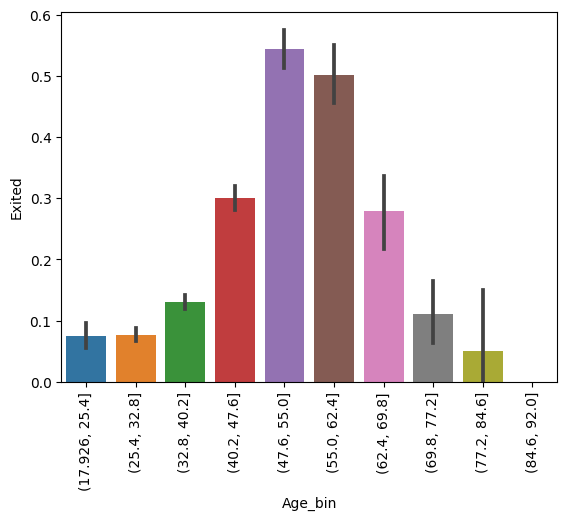

In [155]:
plt.xticks(rotation=90)
sns.barplot(data=df, x="Age_bin", y="Exited");

Наибольший процент ушедших приходится на людей в возрасте 48 - 62 года.

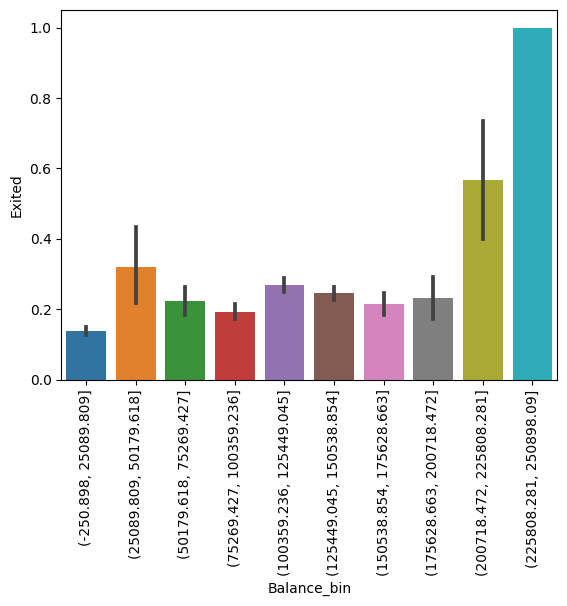

In [156]:
plt.xticks(rotation=90)
sns.barplot(data=df, x="Balance_bin", y="Exited");

Самый большой процент ушедших приходится на людей с самыми большими балансами, однако таких клиентов очень мало (см. ниже). Самая многочисленная группа клиентов является самой "преданной"

In [157]:
df.groupby(by="Balance_bin")["Exited"].count()

Balance_bin
(-250.898, 25089.809]       3623
(25089.809, 50179.618]        69
(50179.618, 75269.427]       360
(75269.427, 100359.236]     1173
(100359.236, 125449.045]    2081
(125449.045, 150538.854]    1747
(150538.854, 175628.663]     729
(175628.663, 200718.472]     186
(200718.472, 225808.281]      30
(225808.281, 250898.09]        2
Name: Exited, dtype: int64